## 이미지 분류(MLP)

In [5]:
# 라이브러리
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
# version
tf.__version__

'2.16.1'

In [7]:
# 데이터셋 불러오기
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
# 데이터 크기
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
import numpy as np
np.set_printoptions(linewidth=120)
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

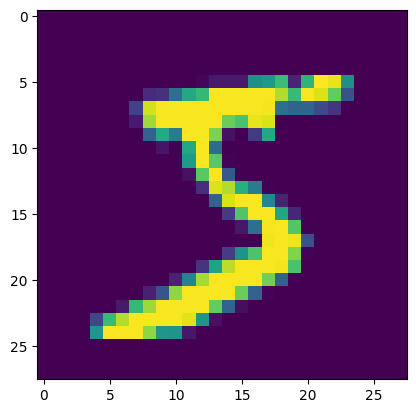

In [10]:
# 데이터 확인(이미지)
plt.imshow(X_train[0])

In [11]:
# 라벨 확인
y_train[0]

5

In [12]:
# 모델
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(256, activation="relu"),
    Dense(10, activation="softmax")
])

In [13]:
# 모델 요약
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 컴파일
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [15]:
# 학습
history = model.fit(X_train, y_train, epochs=10) # batch_size=32

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8503 - loss: 7.7464
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9251 - loss: 0.3270
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9401 - loss: 0.2644
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9441 - loss: 0.2372
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9491 - loss: 0.2181
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9514 - loss: 0.2081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9549 - loss: 0.2009
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9566 - loss: 0.1843
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9593 - loss: 0.1747
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9640 - loss: 0.1611


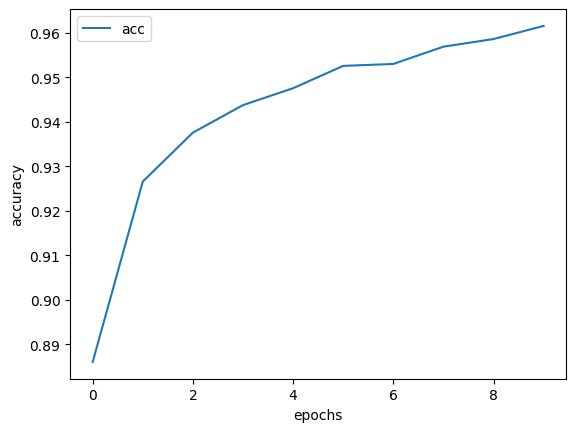

In [16]:
# 학습 정확도
plt.plot(history.history["accuracy"], label="acc")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

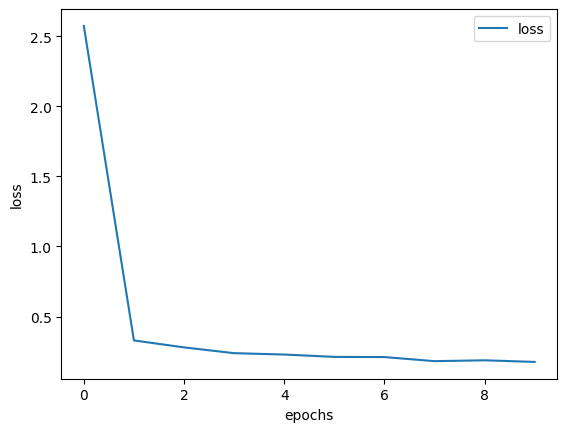

In [17]:
# loss
plt.plot(history.history["loss"], label="loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

### fshion_mnist 데이터

In [18]:
# 라이브러리
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [75]:
# 데이터 불러오기
mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [76]:
# 정규화
X_train, X_test = X_train / 255.0, X_test / 255.0

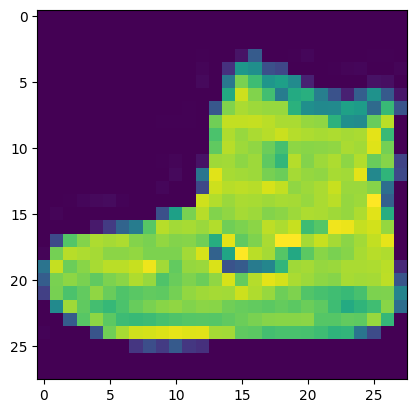

In [21]:
# 데이터 확인
plt.imshow(X_train[0])

In [27]:
y_train[0]

9

In [28]:
classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sendal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
print(classes[y_train[0]])

Ankle boot


T-shirt/top


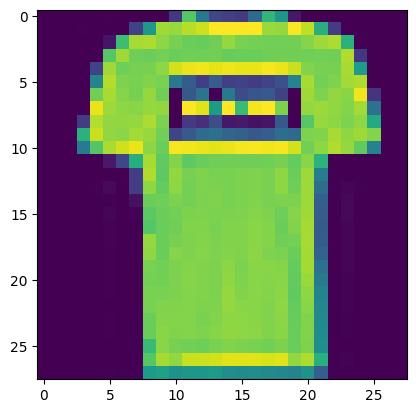

In [ ]:
# 데이터 확인
print(classes[y_train[1]])
plt.imshow(X_train[1])

In [30]:
# 모델
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

model = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.2),
    Dense(10, activation="softmax")
])

In [77]:
# 컴파일
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), # "sparse_categorical_crossentropy"
    metrics=[
        tf.keras.metrics.SparseCategoricalAccuracy()
    ]
)

In [78]:
# 학습
# history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)
hisotry = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 212.6272 - sparse_categorical_accuracy: 0.4030 - val_loss: 0.6932 - val_sparse_categorical_accuracy: 0.8111
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.6431 - sparse_categorical_accuracy: 0.8064 - val_loss: 0.4747 - val_sparse_categorical_accuracy: 0.8343
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4829 - sparse_categorical_accuracy: 0.8302 - val_loss: 0.4663 - val_sparse_categorical_accuracy: 0.8358
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4244 - sparse_categorical_accuracy: 0.8466 - val_loss: 0.4205 - val_sparse_categorical_accuracy: 0.8483
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3973 - sparse_categorical_accuracy: 0.8559 - val_loss: 0.3837 - val_sparse_categorical_accuracy: 0.8612
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3719 - sparse_categorical_accuracy: 0.8646 - val_loss: 0.3830 - val_sparse_categorical_accurac

In [80]:
history.history.keys()

dict_keys(['accuracy', 'loss'])

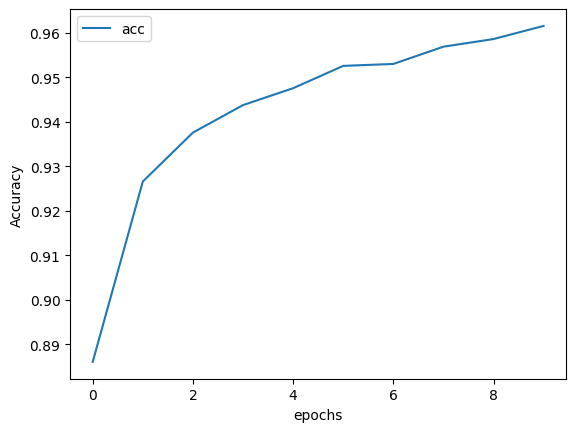

In [82]:
# 학습 정확도
plt.plot(history.history["accuracy"], label="acc")
# plt.plot(history.history["val_accuracy"], label="val")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

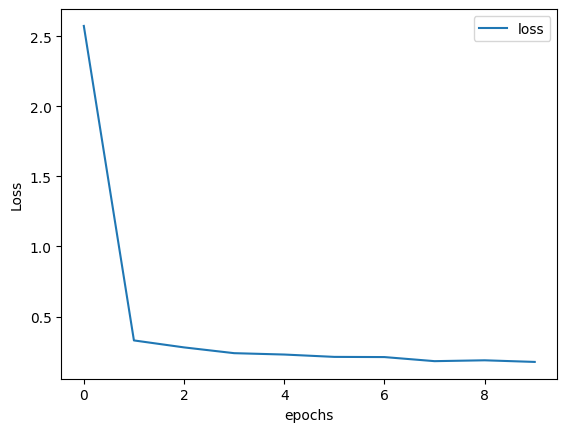

In [84]:
# loss
plt.plot(history.history["loss"], label="loss")
# plt.plot(history.history["val_loss"], label="loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [85]:
# 예측
pred = model.predict(X_test)
pred[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step


array([2.6175073e-10, 3.1448191e-11, 1.2667527e-11, 1.1963608e-10, 5.1524864e-11, 1.0323016e-03, 2.4449103e-09,
       3.9177784e-03, 8.9381320e-09, 9.9504995e-01], dtype=float32)

In [86]:
# 가장 높은 값 찾기
np.argmax(pred[0])

9

In [87]:
# 예측한 label
classes[np.argmax(pred[0])]

'Ankle boot'

In [89]:
# 실제 label
classes[y_test[0]]

'Ankle boot'

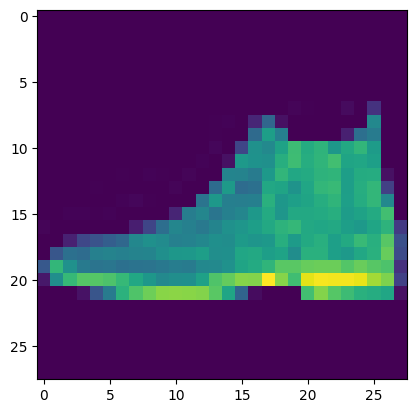

In [90]:
# 이미지 확인
plt.imshow(X_test[0])